In [49]:
import seaborn as sns
from statannot import add_stat_annotation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
sns.set(style='white',font_scale=1.5,)


In [50]:
df = pd.read_excel('./aggresive result.xlsx')

In [51]:
#df = df.set_index('PID')

In [52]:
set1 =  [ '1mer', '2mer', '3mer']

hue = 'Group'

x = 'Total Protein'
y = 'Relative intensity'
hue_order = set1
order = ["more aggresive", 'less aggresive']
box_pairs = [((col, "more aggresive"), (col, "less aggresive")) for col in set1 ]

res= []
for i in set1:
    df1 = df[i].to_frame(name = y)
    df1[x] = i
    res.append(df1)
    
data = pd.concat(res)
data = data.join(df['Group'])

In [53]:
box_pairs

[(('1mer', 'more aggresive'), ('1mer', 'less aggresive')),
 (('2mer', 'more aggresive'), ('2mer', 'less aggresive')),
 (('3mer', 'more aggresive'), ('3mer', 'less aggresive'))]

/home/shenwanxiang/.local/lib/python3.6/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2mer_more aggresive v.s. 2mer_less aggresive: Mann-Whitney-Wilcoxon test greater with Bonferroni correction, P_val=1.835e-03 U_stat=1.030e+02
1mer_more aggresive v.s. 1mer_less aggresive: Mann-Whitney-Wilcoxon test greater with Bonferroni correction, P_val=8.615e-02 U_stat=8.300e+01
3mer_more aggresive v.s. 3mer_less aggresive: Mann-Whitney-Wilcoxon test greater with Bonferroni correction, P_val=5.423e-04 U_stat=1.080e+02


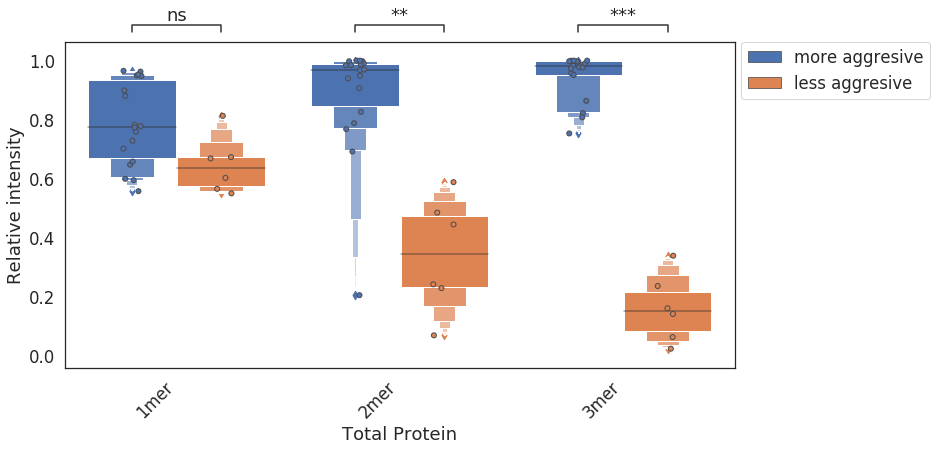

In [54]:
fig, ax = plt.subplots(figsize= (12,6))

sns.stripplot(x=x, y=y, 
              data=data, jitter=True, hue = hue,ax = ax,
              split=True,linewidth=1,edgecolor='gray')



sns.boxenplot(data=data, x=x, y=y, hue = hue, ax= ax, width = 0.8, saturation = 1,)

test_results = add_stat_annotation(ax, data=data, x=x, y=y, hue=hue,
                                   box_pairs=box_pairs, 
                                   test='Mann-Whitney-gt', text_format='star',
                                   loc='outside', verbose=2)

handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, ha='right')

plt.savefig('1-mer.pdf', dpi=400, bbox_inches='tight')